# Zillow CSV ETL process

This code serves as a blueprint for the csv ETL process. You will need to update certain field and column names in this report according to the csv file name, the metric and report under consideration, and so on. There are annotations provided throughout to guide you through the code.

In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Declare Variables

In [2]:
#Add inputs here, and clean csv should auto-populate
raw_csv_path = 'Resources_Raw/raw_median_sale_to_list_week_all.csv'
clean_csv_path = 'Resources_Clean/clean_median_sale_to_list_week_all.csv'
metric_name = 'Median Sale to List Ratio'

In [3]:
initial_csv = Path(raw_csv_path)
initial_df = pd.read_csv(initial_csv)
initial_df

,RegionID,SizeRank,RegionName,RegionType,StateName,1/6/18,1/13/18,1/20/18,1/27/18,2/3/18,...,8/5/23,8/12/23,8/19/23,8/26/23,9/2/23,9/9/23,9/16/23,9/23/23,9/30/23,10/7/23
0,102001,0,United States,country,NaN,0.982987,0.982414,0.981818,0.981133,0.980392,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,394913,1,"New York, NY",msa,NY,0.975123,0.978865,0.979016,0.976478,0.977842,...,1.007752,1.002024,1.012586,1.004724,1.007708,1.007407,1.005829,1.001541,1.001669,1.000002
2,753899,2,"Los Angeles, CA",msa,CA,1.000000,0.998563,0.999088,0.993837,0.998596,...,1.003802,1.008696,1.006667,1.008421,1.005446,1.001429,1.001440,1.000870,1.000014,1.000068
3,394463,3,"Chicago, IL",msa,IL,0.973317,0.971199,0.971429,0.970285,0.968874,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,394514,4,"Dallas, TX",msa,TX,0.987549,0.986486,0.989011,0.985373,0.989656,...,0.997519,0.997692,0.991972,0.994559,0.994954,0.992537,0.992786,0.992754,0.990811,0.989717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,395086,402,"Sevierville, TN",msa,TN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.950864,0.983287
221,394410,408,"Brainerd, MN",msa,MN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.995916,0.984523,1.000000,1.000000,1.000000,0.985889,0.988372,1.000000,1.000000
222,394928,410,"Ocean City, NJ",msa,NJ,NaN,NaN,NaN,NaN,NaN,...,0.983337,0.974194,0.966465,0.976801,0.977778,0.992308,0.989785,0.975974,0.985294,1.000000
223,394674,467,"Heber, UT",msa,UT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.963776,0.952261,0.957199,0.963463,0.967742,0.959845


# Remove Nulls from DataFrame

In [4]:
#Checks if any Date column has a null for a given RegionName

#looks at column range from 6th column to last column in df
date_columns_slice = initial_df.iloc[:, 5:-1]

#looks at every row in this column range, and checks for null values
date_range_columns = initial_df.loc[:,date_columns_slice.columns] 
null_check = date_range_columns.isna().any(axis=1)

#Reverse filter based on null check for rows without null
null_check_df = initial_df.loc[~null_check, :]

#Preview
null_check_df

,RegionID,SizeRank,RegionName,RegionType,StateName,1/6/18,1/13/18,1/20/18,1/27/18,2/3/18,...,8/5/23,8/12/23,8/19/23,8/26/23,9/2/23,9/9/23,9/16/23,9/23/23,9/30/23,10/7/23
0,102001,0,United States,country,NaN,0.982987,0.982414,0.981818,0.981133,0.980392,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,394913,1,"New York, NY",msa,NY,0.975123,0.978865,0.979016,0.976478,0.977842,...,1.007752,1.002024,1.012586,1.004724,1.007708,1.007407,1.005829,1.001541,1.001669,1.000002
2,753899,2,"Los Angeles, CA",msa,CA,1.000000,0.998563,0.999088,0.993837,0.998596,...,1.003802,1.008696,1.006667,1.008421,1.005446,1.001429,1.001440,1.000870,1.000014,1.000068
3,394463,3,"Chicago, IL",msa,IL,0.973317,0.971199,0.971429,0.970285,0.968874,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,394514,4,"Dallas, TX",msa,TX,0.987549,0.986486,0.989011,0.985373,0.989656,...,0.997519,0.997692,0.991972,0.994559,0.994954,0.992537,0.992786,0.992754,0.990811,0.989717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,845160,198,"Prescott Valley, AZ",msa,AZ,0.972542,0.980851,0.986776,0.972644,0.981663,...,0.994404,1.000000,0.988372,0.991852,0.980952,0.981795,0.992803,0.980469,0.974609,0.989899
176,394361,202,"Barnstable Town, MA",msa,MA,0.969499,0.962662,0.971940,0.965714,0.970850,...,0.991984,1.003584,1.000000,0.992832,1.001404,0.994472,1.000000,1.000000,1.000000,1.000000
193,394380,232,"Bend, OR",msa,OR,0.992076,0.996999,0.983631,0.992304,0.990783,...,1.000000,0.988964,0.987428,0.980392,0.985074,0.995828,0.991134,0.971652,0.985185,0.979310
196,395009,237,"Punta Gorda, FL",msa,FL,0.957519,0.971014,0.970221,0.970149,0.975488,...,0.971429,0.974647,0.974348,0.969388,0.971984,0.978987,0.971429,0.981456,0.971897,0.974141


# Condense Date Columns to Single Column

In this section, we condense the multiple date columns into a single 'date' column. This allows for easier data visualization moving forward.

In [5]:
condensed_rough_df = pd.DataFrame(null_check_df)

new_rows = []

#For loop to iterate through each RegionName
for _, row in condensed_rough_df.iterrows():
    region_ID = row['RegionID']
    size_rank = row['SizeRank']
    region_name = row['RegionName']
    region_type = row['RegionType']
    state_name = row['StateName']
    
    #For loop to iterate through each Date Column within a given RegionName
    for date_column in condensed_rough_df.columns[5:]:
        date = pd.to_datetime(date_column)
        value = row[date_column]
        
        #Add 'Date' and 'value' values for a given Date and Region into new_rows list.
        new_rows.append([region_ID,size_rank,region_name,region_type,state_name, date, value])

#New df based on new_rows 'list'
condensed_df = pd.DataFrame(new_rows, columns=
                             ['Region ID',
                              'Size Rank',
                              'Region Name',
                              'Region Type',
                              'State Name',
                              'Date',
                              metric_name])


#create moving average column for each Region.
window_size = 3 #time period (weeks)
condensed_df[f'{metric_name} Rolling Avg'] = condensed_df.groupby('Region Name')[metric_name].rolling(window=window_size).mean().reset_index(level=0, drop=True)

#preview df
condensed_df

,Region ID,Size Rank,Region Name,Region Type,State Name,Date,Median Sale to List Ratio,Median Sale to List Ratio Rolling Avg
0,102001,0,United States,country,NaN,2018-01-06,0.982987,NaN
1,102001,0,United States,country,NaN,2018-01-13,0.982414,NaN
2,102001,0,United States,country,NaN,2018-01-20,0.981818,0.982406
3,102001,0,United States,country,NaN,2018-01-27,0.981133,0.981788
4,102001,0,United States,country,NaN,2018-02-03,0.980392,0.981114
...,...,...,...,...,...,...,...,...
29493,394685,289,"Homosassa Springs, FL",msa,FL,2023-09-09,0.973112,0.977048
29494,394685,289,"Homosassa Springs, FL",msa,FL,2023-09-16,0.976838,0.974770
29495,394685,289,"Homosassa Springs, FL",msa,FL,2023-09-23,0.973754,0.974568
29496,394685,289,"Homosassa Springs, FL",msa,FL,2023-09-30,0.978906,0.976499


# Analysis Testing

Section I created to test initial clean dataframe. Use only as a referance for chart output.

In [6]:
MSA_filter = ['United States','New York, NY','Los Angeles, CA','Chicago, IL','Dallas, TX']

short_table = condensed_df['Region Name'].isin(MSA_filter)
filtered_df = condensed_df[short_table]

filtered_df

,Region ID,Size Rank,Region Name,Region Type,State Name,Date,Median Sale to List Ratio,Median Sale to List Ratio Rolling Avg
0,102001,0,United States,country,NaN,2018-01-06,0.982987,NaN
1,102001,0,United States,country,NaN,2018-01-13,0.982414,NaN
2,102001,0,United States,country,NaN,2018-01-20,0.981818,0.982406
3,102001,0,United States,country,NaN,2018-01-27,0.981133,0.981788
4,102001,0,United States,country,NaN,2018-02-03,0.980392,0.981114
...,...,...,...,...,...,...,...,...
1500,394514,4,"Dallas, TX",msa,TX,2023-09-09,0.992537,0.994016
1501,394514,4,"Dallas, TX",msa,TX,2023-09-16,0.992786,0.993425
1502,394514,4,"Dallas, TX",msa,TX,2023-09-23,0.992754,0.992692
1503,394514,4,"Dallas, TX",msa,TX,2023-09-30,0.990811,0.992117


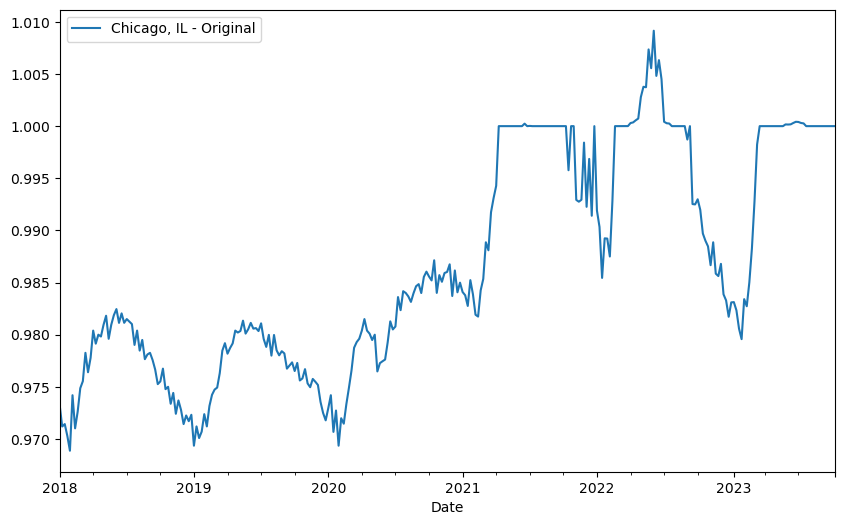

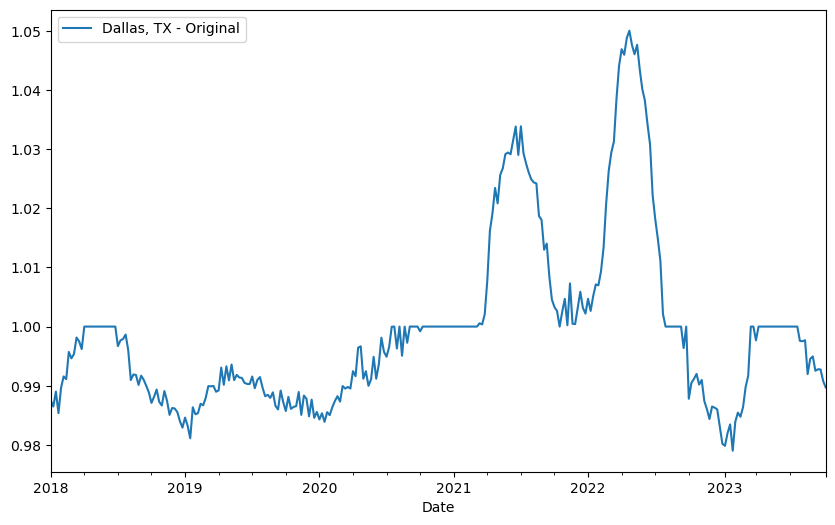

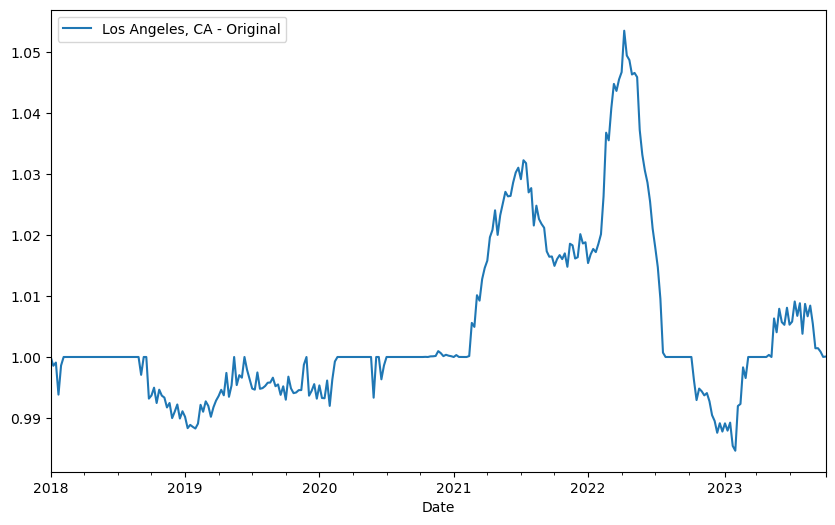

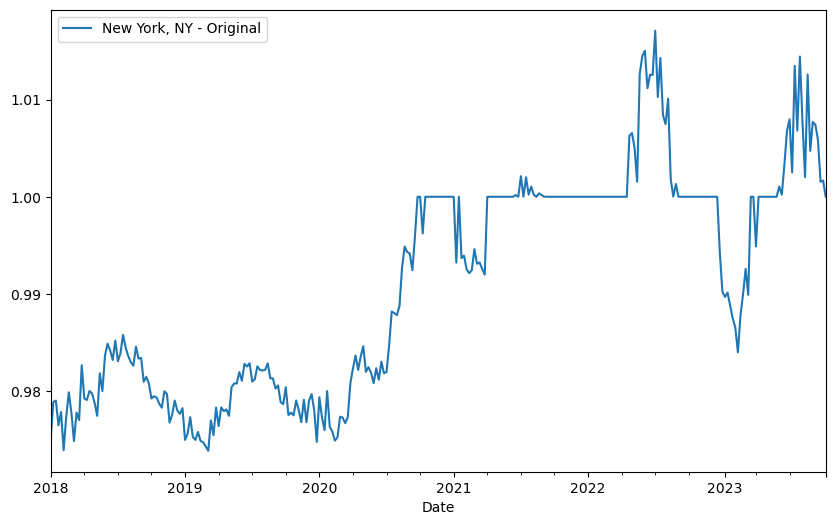

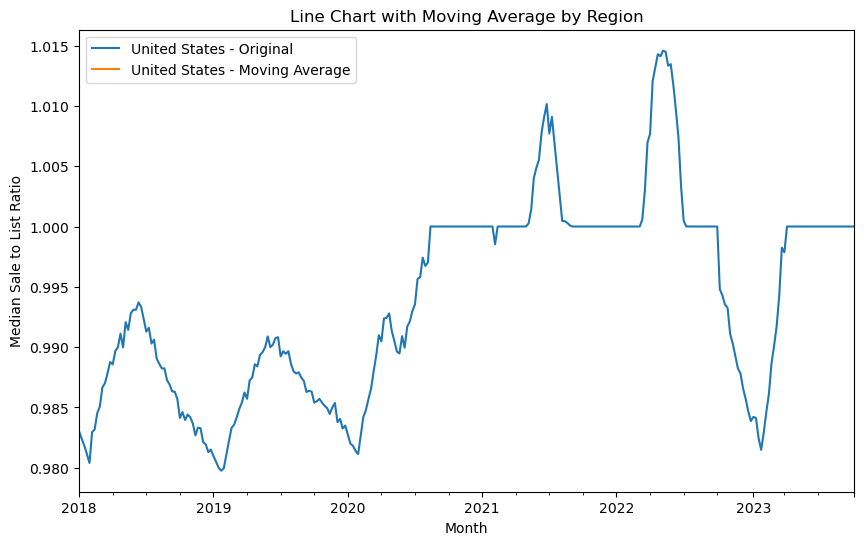

In [7]:
window_size = 3

for region, data in filtered_df.groupby('Region Name'):
    data.plot(kind='line', x='Date', y=metric_name, label=f'{region} - Original', figsize=(10, 6))
    plt.plot(data['Date'], data[f'{metric_name} Rolling Avg'], label=f'{region} - Moving Average')

    
plt.title('Line Chart with Moving Average by Region')
plt.xlabel('Month')
plt.ylabel(metric_name)
plt.legend()
plt.show()

# Generate Clean CSV File

In [8]:
#IMPORTANT -- CHANGE CSV OUTPUT NAME RELEVANT REPORT
condensed_df.to_csv(clean_csv_path, index=False)